In [1]:
import numpy as np
import pandas as pd
import matplotlib.pyplot as plt
import seaborn as sns
import pandas as pd
import os

In [2]:
df = pd.read_csv("workspace_table.csv")
df = pd.read_csv("workspace_table.csv")
data = df.dropna()
print(data.duplicated().any())

data

False


,Unnamed: 0,ID,MONTHS_BALANCE,STATUS,CODE_GENDER,FLAG_OWN_CAR,FLAG_OWN_REALTY,CNT_CHILDREN,AMT_INCOME_TOTAL,NAME_INCOME_TYPE,...,NAME_FAMILY_STATUS,NAME_HOUSING_TYPE,DAYS_BIRTH,DAYS_EMPLOYED,FLAG_MOBIL,FLAG_WORK_PHONE,FLAG_PHONE,FLAG_EMAIL,OCCUPATION_TYPE,CNT_FAM_MEMBERS
31,31,5008806,0,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
32,32,5008806,-1,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
33,33,5008806,-2,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
34,34,5008806,-3,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
35,35,5008806,-4,C,M,Y,Y,0,112500.0,Working,...,Married,House / apartment,-21474,-1134,1,0,0,0,Security staff,2.0
...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...,...
649738,649738,5150487,-25,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649739,649739,5150487,-26,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649740,649740,5150487,-27,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0
649741,649741,5150487,-28,C,M,Y,N,0,202500.0,Working,...,Married,House / apartment,-19398,-2166,1,0,0,0,Drivers,2.0


In [3]:
#Jaki % klientów jest niewypłacalny? 
#Przyjmujemy, że niewypłacalny jest klient, który spóźnia się ze spłatą powyżej 3 miesięcy.

#Ilość klientów (unikalne ID)
print("Liczba zarejestrowanych transakcji: ", data["ID"].count())
print( "Ilość klientów banku: ", data["ID"].nunique())
loan = data[data["STATUS"]!= "X"]
clients_with_loan = loan["ID"].nunique()

print("Ilość klientów banku, mających pożyczkę: ", clients_with_loan)
insolvent3 = data[data["STATUS"]== "3"] # niewypłacalni w grupie 3
print("Ilość klientów niewypłacalnych w grupie 3 : ", len(insolvent3))
insolvent4 = data[data["STATUS"]== "4"] # niewypłacalni w grupie 4
print("Ilość klientów niewypłacalnych w grupie 4 : ", len(insolvent4))
insolvent5 = data[data["STATUS"]== "5"] # niewypłacalni w grupie 5
print("Ilość klientów niewypłacalnych w grupie 5 : ", len(insolvent5))

insolvent = len(insolvent3) + len(insolvent4) + len(insolvent5)
print("Łączna ilość klientów niewypłacalnych: ", insolvent)

insolvent_percentage = print("Procent niewypłacalnych klientów: ", 100*(insolvent/clients_with_loan))

#Procent niewypłacalnych klientów został przyjęty w taki sposób, że mimo zarejestrowanych ponad 500 tys. transakcji, 
#procent klientów liczymy od unikalnego ID, tj. przyjmujemy założenie, że jeśli dany klient choć raz trafił do
# grupy 3,4 lub 5, to uznany jest za niewypłacalnego.



Liczba zarejestrowanych transakcji:  537667
Ilość klientów banku:  25134
Ilość klientów banku, mających pożyczkę:  22737
Ilość klientów niewypłacalnych w grupie 3 :  181
Ilość klientów niewypłacalnych w grupie 4 :  152
Ilość klientów niewypłacalnych w grupie 5 :  1087
Łączna ilość klientów niewypłacalnych:  1420
Procent niewypłacalnych klientów:  6.245327000043981


C:\Users\Hyperbook\anaconda3\lib\site-packages\ipykernel_launcher.py:1: UserWarning: Boolean Series key will be reindexed to match DataFrame index.
  """Entry point for launching an IPython kernel.


Text(0, 0.5, 'Ilość klientów')

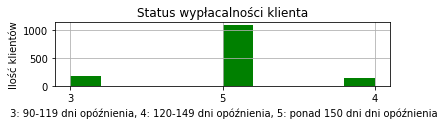

In [4]:
insol = loan[loan["STATUS"]!= "C"][loan["STATUS"]!= "X"][loan["STATUS"]!= "0"][loan["STATUS"]!= "1"][loan["STATUS"]!= "2"]
plt.subplot(3,1,1)
plt.title("Status wypłacalności klienta")
plt.hist(insol["STATUS"], facecolor='g')
plt.grid(True)
plt.xlabel(" 3: 90-119 dni opóźnienia, 4: 120-149 dni opóźnienia, 5: ponad 150 dni dni opóźnienia")
plt.ylabel("Ilość klientów")

In [5]:
#Jak % rozkłada się niewypłacalność w danych zakresach rocznego przychodu? 

income150 = data[data["AMT_INCOME_TOTAL"]<150000]["ID"].nunique()
print(income150)
insol150 =  insol[insol["AMT_INCOME_TOTAL"]<150000]["ID"].count()
print(insol150)
print("Przy dochodach do 150 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol150/income150))

income185 = data[data["AMT_INCOME_TOTAL"]<185000]["ID"].nunique()
print(income185)
insol185 =  insol[insol["AMT_INCOME_TOTAL"]<185000]["ID"].count()
print(insol185)
print("Przy dochodach do 185 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol185/income185))

income200 = data[data["AMT_INCOME_TOTAL"]<200000]data["AMT_INCOME_TOTAL"]>=185000]]["ID"].nunique()
print(income200)
insol200 =  insol[insol["AMT_INCOME_TOTAL"]<200000["AMT_INCOME_TOTAL"]>=185000]]["ID"].count()
print(insol200)
print("Przy dochodach do 200 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol200/income200))

income150 = data[data["AMT_INCOME_TOTAL"]<225000]["ID"].nunique()
print(income225)
insol150 =  insol[insol["AMT_INCOME_TOTAL"]<225000]["ID"].count()
print(insol225)
print("Przy dochodach do 225 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol225/income225))

income250 = data[data["AMT_INCOME_TOTAL"]>=250000]["ID"].nunique()
print(income250)
insol250 =  insol[insol["AMT_INCOME_TOTAL"]>=250000]["ID"].count()
print(insol250)
print("Przy dochodach powyżej 225 tys. dolarów rocznie, procent niewypłacalnych wynosi: ", 100*(insol250/income250))


SyntaxError: invalid syntax (<ipython-input-5-dac0a717e818>, line 15)

In [ ]:
type = insol[["NAME_INCOME_TYPE",  "ID"]].groupby(by=["NAME_INCOME_TYPE"]).count()
t1 = type["ID"]

In [6]:
all_type = loan[["NAME_INCOME_TYPE", "ID"]].groupby(by=["NAME_INCOME_TYPE"]).count()
t2 = all_type["ID"]

percent_type = 100*(t1/t2)
print(percent_type)

NameError: name 't1' is not defined

In [7]:
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
insol["BINS"] = pd.cut(insol["AMT_INCOME_TOTAL"], bins)
bin_grouped = insol.groupby(by= "BINS" ).count()
bin_grouped["ID"]



BINS
(0, 150000]           560
(150000, 185000]      262
(185000, 200000]       26
(200000, 225000]      233
(225000, 10000000]    339
Name: ID, dtype: int64

In [8]:
bins = pd.IntervalIndex.from_tuples([(0, 150000), (150000, 185000), (185000, 200000), (200000, 225000), (225000, 10000000)])
loan["BINS_1"] = pd.cut(loan["AMT_INCOME_TOTAL"], bins)
bin_grouped_all = loan.groupby(by= "BINS_1" ).count()
bin_grouped_all["ID"]

C:\Users\Hyperbook\anaconda3\lib\site-packages\ipykernel_launcher.py:2: SettingWithCopyWarning: 
A value is trying to be set on a copy of a slice from a DataFrame.
Try using .loc[row_indexer,col_indexer] = value instead

See the caveats in the documentation: https://pandas.pydata.org/pandas-docs/stable/user_guide/indexing.html#returning-a-view-versus-a-copy
  


BINS_1
(0, 150000]           162999
(150000, 185000]       88883
(185000, 200000]        4694
(200000, 225000]       71204
(225000, 10000000]    107720
Name: ID, dtype: int64